In [13]:
# Machine learning, linear regression model\
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
# 2. Load the dataset
df = pd.read_excel('SalariesVsExperience.xlsx')
df.head()

,Years Experience,Salary
0,NaN,25805
1,1.3,21393
2,1.5,23266
3,2.0,28108
4,2.2,31532


In [20]:
#check for null values
print(df.isnull().sum())


Years Experience    1
Salary              0
dtype: int64


In [24]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Years Experience  100 non-null    float64
 1   Salary            101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


,count,mean,std,min,25%,50%,75%,max
Years Experience,100.0,4.590000,2.793806,0.2,2.3,3.95,6.95,10.0
Salary,101.0,41078.029703,13414.617253,19097.0,31522.0,38281.00,50909.00,69765.0


In [ ]:
# 3. Data Preprocessing
# Check for null values and handle them if necessary
#in this case there is null values in the dataset
df.dropna(inplace=True)
df.isnull().sum()


Years Experience    0
Salary              0
dtype: int64

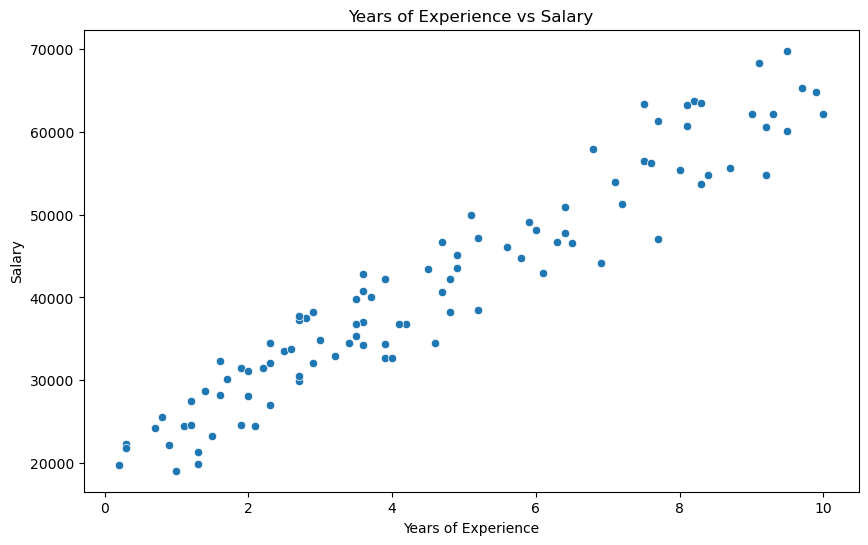

In [29]:
# 4. Data Visualization
# Visualize the relationship between Years of Experience and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Years Experience', y='Salary')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [30]:
# 5. Feature Selection
X = df[['Years Experience']]
y = df['Salary']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 6. Model Training
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

    Actual     Predicted
84   44134  51813.491646
54   42260  37995.031000
71   21857  21412.878224
46   35331  36152.569580
45   43481  40758.723129
Mean Squared Error: 12604520.712299762
R^2 Score: 0.9108517017745354


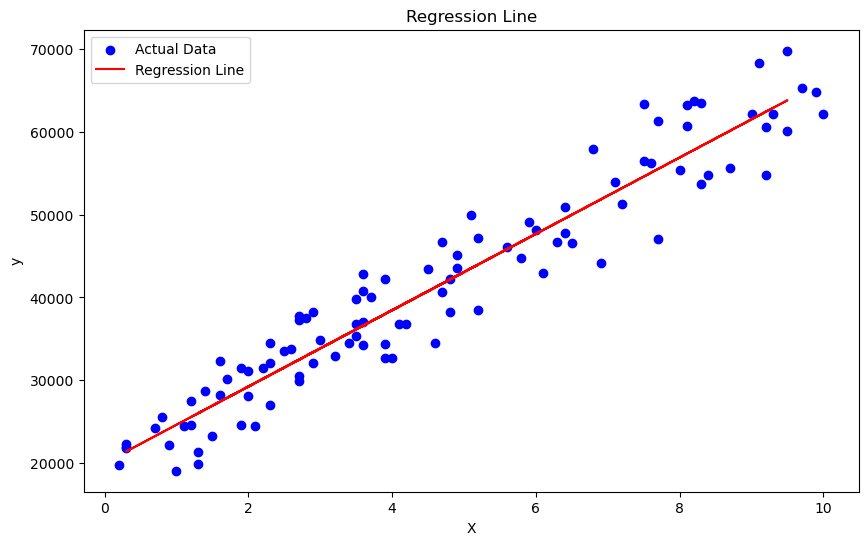

In [32]:
# 7. Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)
# Compare predicted vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())
# Calculate the model's performance metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
# 8. Visualization of the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [33]:
# use test data to predict salary for 5 years of experience
years_of_experience = np.array([[5]])
predicted_salary = model.predict(years_of_experience)
print(f'Predicted Salary for 5 years of experience: {predicted_salary[0]}')


Predicted Salary for 5 years of experience: 43061.79990333607


c:\Users\jpsea\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
